In [2]:
from dlsite_analyzer.config import RAW_JSON_DATA_DIR
from dlsite_analyzer import (
    initialize_database,
    fetch_and_save_voice_works,
    import_voice_works_to_db,
)

In [3]:
# データベースにテーブルが存在しない場合は初期化する
initialize_database()

2024-11-10 03:26:57 INFO     dlsite_analyzer Database initialized successfully.


In [ ]:
# ボイス作品のデータをJSONファイルに保存
fetch_and_save_voice_works(RAW_JSON_DATA_DIR)

2024-11-08 19:00:31 INFO     dlsite_analyzer Total pages to process: 545
100%|██████████| 545/545 [43:58<00:00,  4.84s/it]
2024-11-08 19:44:30 INFO     dlsite_analyzer Finished saving voice works to JSON files.


In [4]:
# JSONファイルからデータベースにデータをインポート
import_voice_works_to_db(RAW_JSON_DATA_DIR)

Importing JSON to DB: 100%|██████████| 545/545 [00:01<00:00, 291.36it/s]
2024-11-10 03:27:01 INFO     dlsite_analyzer All JSON data imported to the database.


# Mecabテスト

In [1]:
import MeCab
from dlsite_analyzer.config import (
    MECAB_NEOLOGD_PATH,
    MECAB_USER_DIC_PATH
)
ochasen_tagger = MeCab.Tagger(f'-ochasen -d "{MECAB_NEOLOGD_PATH}" -u "{MECAB_USER_DIC_PATH}"')

In [12]:
text = '【連続おほ声】余裕こいた援交メ○ガキが敗北宣言するまで、何度も何度も絶頂グロッキーイキ地獄'
print(ochasen_tagger.parse(text), end='')

【	記号,括弧開,*,*,*,*,【,【,【
連続	名詞,サ変接続,*,*,*,*,連続,レンゾク,レンゾク
お	接頭詞,名詞接続,*,*,*,*,お,オ,オ
ほ	動詞,自立,*,*,五段・ラ行,体言接続特殊２,ほる,ホ,ホ
声	名詞,一般,*,*,*,*,声,コエ,コエ
】	記号,括弧閉,*,*,*,*,】,】,】
余裕	名詞,一般,*,*,*,*,余裕,ヨユウ,ヨユー
こい	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,こく,コイ,コイ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
援交	名詞,固有名詞,一般,*,*,*,援交,エンコウ,エンコー
メ	名詞,一般,*,*,*,*,*
○	記号,一般,*,*,*,*,○,○,○
ガキ	名詞,一般,*,*,*,*,ガキ,ガキ,ガキ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
敗北	名詞,サ変接続,*,*,*,*,敗北,ハイボク,ハイボク
宣言	名詞,サ変接続,*,*,*,*,宣言,センゲン,センゲン
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
まで	助詞,副助詞,*,*,*,*,まで,マデ,マデ
、	記号,読点,*,*,*,*,、,、,、
何度	名詞,固有名詞,一般,*,*,*,何度,ナンド,ナンド
も	助詞,係助詞,*,*,*,*,も,モ,モ
何度	名詞,固有名詞,一般,*,*,*,何度,ナンド,ナンド
も	助詞,係助詞,*,*,*,*,も,モ,モ
絶頂	名詞,一般,*,*,*,*,絶頂,ゼッチョウ,ゼッチョー
グロッキーイキ	名詞,一般,*,*,*,*,*
地獄	名詞,一般,*,*,*,*,地獄,ジゴク,ジゴク
EOS


In [3]:
text = '''
都立日野南高校の2年生である虎視虎子は、近所や学校でも「お淑やかな優等生」と評判の女子高生。そんな彼女は、「中学までヤンキー（不良）で、高校デビューして優等生になった」という過去を周囲に隠しながら生活していた。
ある日、登校中の虎子は、頭にツノが生えている少女・鹿乃子のこが電線に引っ掛かっていたところを助け、彼女に懐かれる。なぜか、のこに「元ヤン」であることを一目で見破られた虎子は、「ヤンキーのお姉さん」と呼ばれるのが嫌で、のこから名付けられた「こしたん」という愛称を受け入れる。
虎子は「元ヤン」だという過去をばらされたくない思いから、クラスメートとして転校してきたのこを警戒するが、彼女の奇怪な行動に振り回され、あげくに彼女が立ち上げた部活動「シカ部」の部長（のこのお世話係）になる。
月日が流れて2人は3年生に進級し、虎子は生徒会長に就任するが、虎子を偏愛するヤンデレ妹の虎視餡子と、のこに憧れて立派なシカを目指そうとする馬車芽めめの2人の1年生が入部したシカ部では、さらに賑やかで騒々しい日常が繰り広げられる。
一方で、虎子に対抗心を燃やしている生徒会副会長の猫山田根子は、同じく生徒会メンバーである書記の狸小路絹と会計の燕谷千春を巻き込んで、密かに「シカ部の廃部」を企てる。
'''
print(ochasen_tagger.parse(text), end='')

都立	名詞,一般,*,*,*,*,都立,トリツ,トリツ
日野南	名詞,固有名詞,地域,一般,*,*,日野南,ヒノミナミ,ヒノミナミ
高校	名詞,一般,*,*,*,*,高校,コウコウ,コーコー
の	助詞,連体化,*,*,*,*,の,ノ,ノ
2年生	名詞,固有名詞,一般,*,*,*,2年生,ニネンセイ,ニネンセイ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
虎視虎子	名詞,固有名詞,一般,*,*,*,虎視虎子,コシトラコ,コシトラコ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
近所	名詞,一般,*,*,*,*,近所,キンジョ,キンジョ
や	助詞,並立助詞,*,*,*,*,や,ヤ,ヤ
学校	名詞,一般,*,*,*,*,学校,ガッコウ,ガッコー
で	助詞,格助詞,一般,*,*,*,で,デ,デ
も	助詞,係助詞,*,*,*,*,も,モ,モ
「	記号,括弧開,*,*,*,*,「,「,「
お	接頭詞,名詞接続,*,*,*,*,お,オ,オ
淑やか	名詞,形容動詞語幹,*,*,*,*,淑やか,シトヤカ,シトヤカ
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
優等生	名詞,一般,*,*,*,*,優等生,ユウトウセイ,ユートーセイ
」	記号,括弧閉,*,*,*,*,」,」,」
と	助詞,格助詞,引用,*,*,*,と,ト,ト
評判	名詞,一般,*,*,*,*,評判,ヒョウバン,ヒョーバン
の	助詞,連体化,*,*,*,*,の,ノ,ノ
女子高生	名詞,固有名詞,一般,*,*,*,女子高生,ジョシコウセイ,ジョシコーセイ
。	記号,句点,*,*,*,*,。,。,。
そんな	連体詞,*,*,*,*,*,そんな,ソンナ,ソンナ
彼女	名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
「	記号,括弧開,*,*,*,*,「,「,「
中学	名詞,一般,*,*,*,*,中学,チュウガク,チューガク
まで	助詞,副助詞,*,*,*,*,まで,マデ,マデ
ヤンキー	名詞,一般,*,*,*,*,ヤンキー,ヤンキー,ヤンキー
（	記号,括弧開,*,*,*,*,（,（,（
不良	名詞,形

# ワードクラウドの作成

In [4]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from itertools import chain
from pathlib import Path

from dlsite_analyzer.config import DATABASE_PATH
from dlsite_analyzer.database.constants import (
    VOICE_WORKS_TITLE,
    VOICE_WORKS_VIEW_AGE_RATING
)
from dlsite_analyzer.database import (
    DatabaseManager,
    VoiceWorksViewManager,
)
from dlsite_analyzer import (
    extract_words,
    generate_wordcloud,
    plot_wordcloud
)

wordcloud_folder = Path('./data/wordcloud')

In [5]:
with DatabaseManager(DATABASE_PATH) as db:
    voice_works_view_manager = VoiceWorksViewManager(db)
    df = voice_works_view_manager.get_all_voice_works()

In [6]:
df_all_ages = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "全年齢"] # 全年齢作品のみ抽出
df_r15 = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "R-15"] # R-15の作品のみ抽出
df_r18 = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "R-18"] # R-18の作品のみ抽出

# 単語の抽出
# target_pos=["形容詞"]
target_pos=["名詞", "動詞", "形容詞"]
stop_words = []
all_titles_word_list = extract_words(list(df[VOICE_WORKS_TITLE]), target_pos, stop_words)
all_ages_titles_word_list = extract_words(list(df_all_ages[VOICE_WORKS_TITLE]), target_pos, stop_words)
r15_titles_word_list = extract_words(list(df_r15[VOICE_WORKS_TITLE]), target_pos, stop_words)
r18_titles_word_list = extract_words(list(df_r18[VOICE_WORKS_TITLE]), target_pos, stop_words)

100%|██████████| 47578/47578 [00:01<00:00, 25014.02it/s]


In [7]:
# 単語のリストを作成
all_titles_word_list = list(chain.from_iterable(all_titles_word_list))
all_ages_titles_word_list = list(chain.from_iterable(all_ages_titles_word_list))
r15_titles_word_list = list(chain.from_iterable(r15_titles_word_list))
r18_titles_word_list = list(chain.from_iterable(r18_titles_word_list))

In [8]:
# 単語の出現回数をカウント
all_titles_word_count = pd.Series(all_titles_word_list).value_counts()
all_ages_titles_word_count = pd.Series(all_ages_titles_word_list).value_counts()
r15_titles_word_count = pd.Series(r15_titles_word_list).value_counts()
r18_titles_word_count = pd.Series(r18_titles_word_list).value_counts()

In [9]:
# ワードクラウドの作成
font_path = str(wordcloud_folder / 'ipaexg.ttf')
wc_all = generate_wordcloud(all_titles_word_count, font_path=font_path)
wc_all_ages = generate_wordcloud(all_ages_titles_word_count, font_path=font_path)
wc_r15 = generate_wordcloud(r15_titles_word_count, font_path=font_path)
wc_r18 = generate_wordcloud(r18_titles_word_count, font_path=font_path)

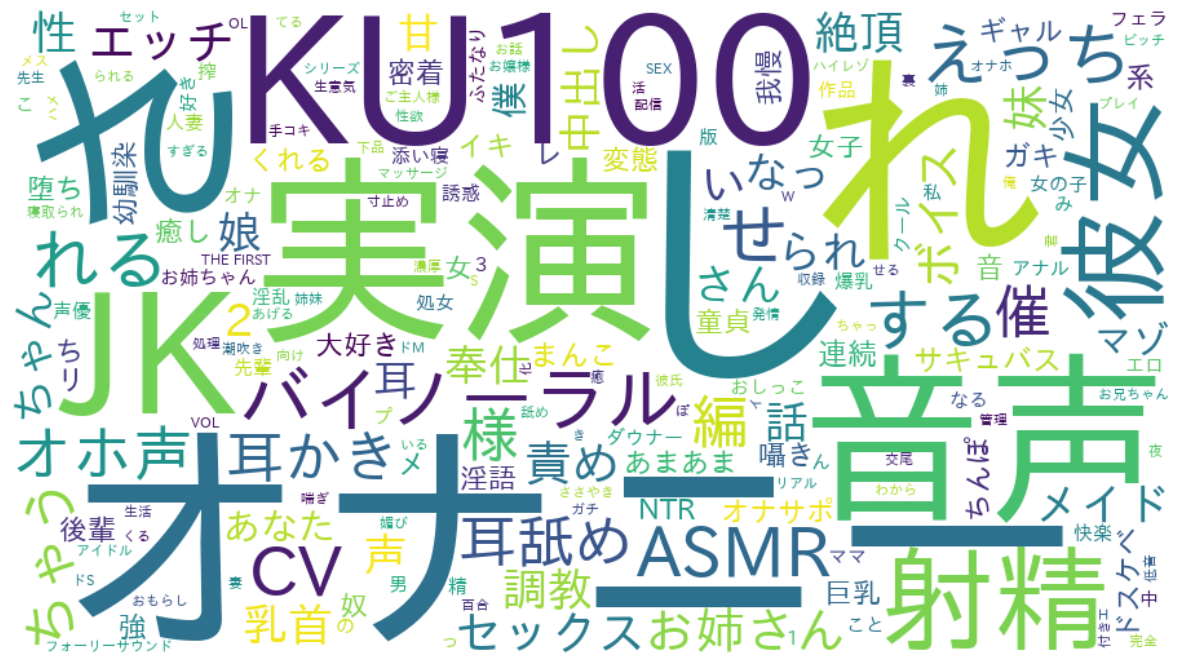

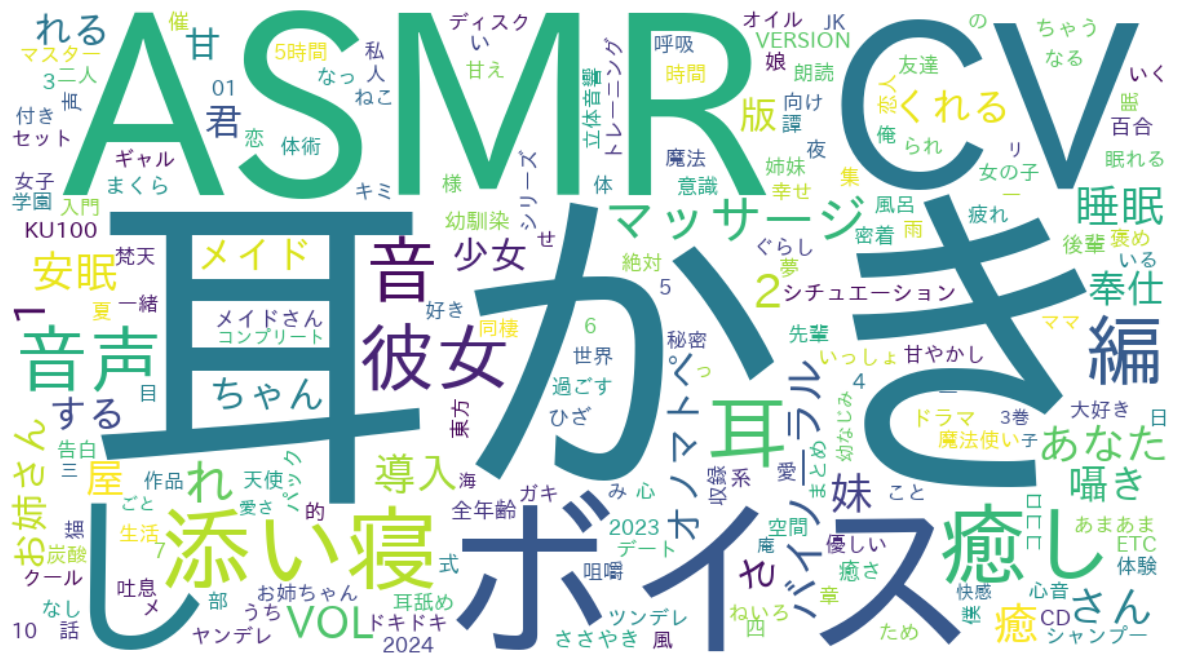

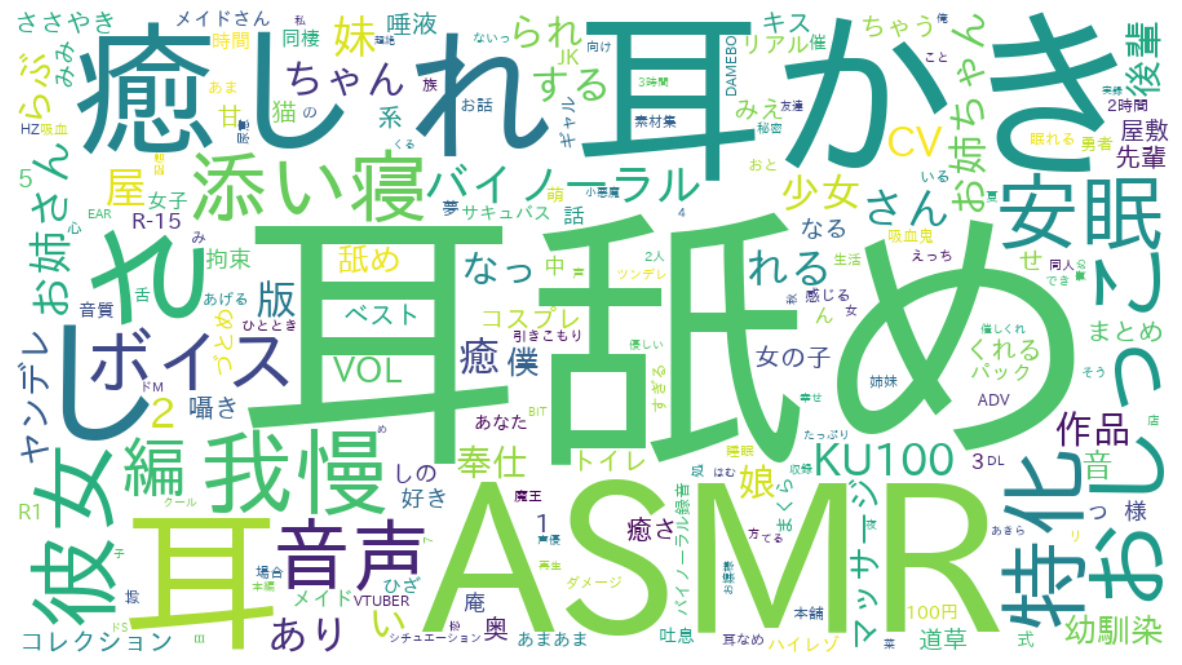

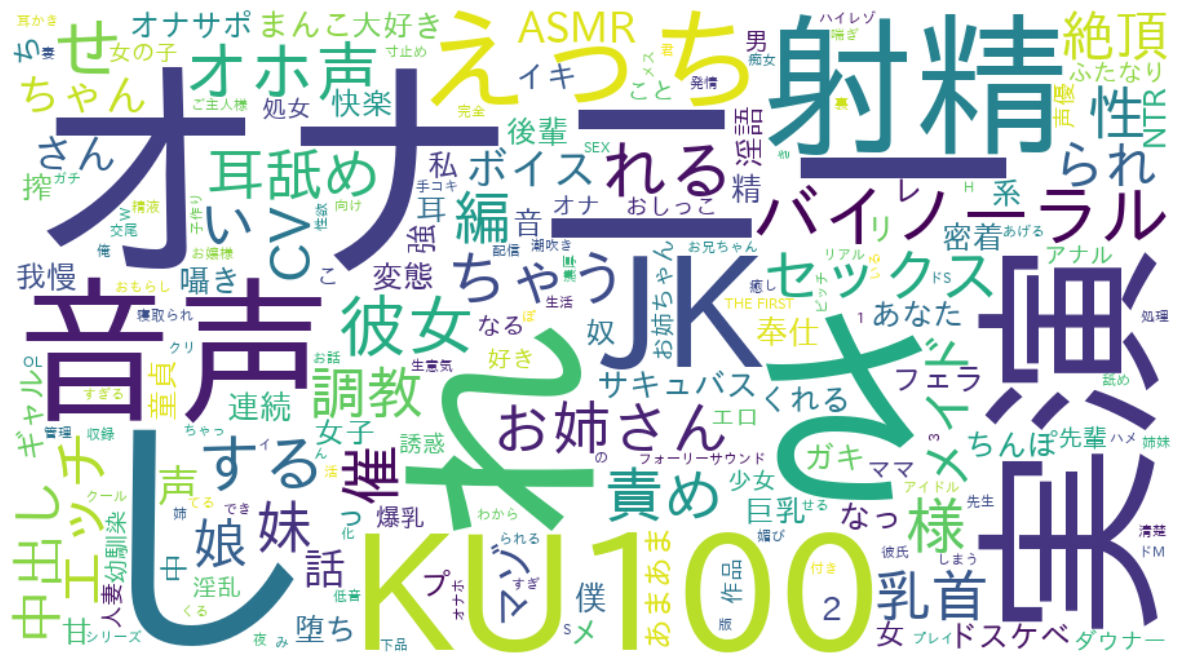

In [10]:
# ワードクラウドの表示
plot_wordcloud(wc_all, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_all.png")
plot_wordcloud(wc_all_ages, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_all_ages.png")
plot_wordcloud(wc_r15, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_r15.png")
plot_wordcloud(wc_r18, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_r18.png")